# Movie Industry - Analysis

Dataset: Movie Industry, four decades of movies

Link: https://www.kaggle.com/datasets/danielgrijalvas/movies/code

## Steps included:

--Importing Liabraries

--Reading CSV

--Data Preparation

--Data Cleaning

--Data Visualization

In [2]:
# Importing Liabraries
import pandas as pd 
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
pd.set_option("display.max_columns", None)

import plotly.express as px
from plotly.subplots import make_subplots

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Reading csv for analysis
movie_df = pd.read_csv(r'D:\Datasets for analysis\MovieIndustry_Kaggle.csv')

# Using fillna to fill any missing value with zero(which is minimal)
movie_df = movie_df.fillna(0)

movie_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Checking for missing data
for col in movie_df.columns:
    pct_missing = np.mean(movie_df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [5]:
# Checking data types of all columns
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656 entries, 0 to 7655
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7656 non-null   object 
 1   rating    7656 non-null   object 
 2   genre     7656 non-null   object 
 3   year      7656 non-null   int64  
 4   released  7656 non-null   object 
 5   score     7656 non-null   float64
 6   votes     7656 non-null   float64
 7   director  7656 non-null   object 
 8   writer    7656 non-null   object 
 9   star      7656 non-null   object 
 10  country   7656 non-null   object 
 11  budget    7656 non-null   float64
 12  gross     7656 non-null   float64
 13  company   7656 non-null   object 
 14  runtime   7656 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 897.3+ KB


In [6]:
# Raw numeric data
movie_df.describe()

,year,score,votes,budget,gross,runtime
count,7656.000000,7656.000000,7.656000e+03,7.656000e+03,7.656000e+03,7656.000000
mean,2000.415230,6.388127,8.818158e+04,2.554874e+07,7.668506e+07,107.238636
std,11.150763,0.976966,1.634004e+05,3.860889e+07,1.642226e+08,18.667565
min,1980.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1991.000000,5.800000,9.100000e+03,0.000000e+00,3.916029e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,1.200000e+07,1.909974e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,3.200000e+07,7.284617e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
# Changing data type for calculations
movie_df['budget'] = movie_df['budget'].astype('int64')
movie_df['gross'] = movie_df['gross'].astype('int64')
movie_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [8]:
# Removing duplicates
df = movie_df[movie_df.duplicated()]
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [9]:
# Print shape of released
print("Shape of released: ", movie_df.shape)

# Print duplicate rows
print("Duplicated rows: ", movie_df.duplicated(keep=False).sum())

# Print missing values
print("Missing values count:\n", movie_df.isnull().sum())

# Shape if we drop all NA's
print("If drop all NAs: ", movie_df.dropna().shape)

Shape of released:  (7656, 15)
Duplicated rows:  0
Missing values count:
 name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64
If drop all NAs:  (7656, 15)


In [10]:
# Rows which doesnt have full date.
movie_df['released'].apply(lambda x: len(x.split('(')[0].split()) != 3).sum()

47

In [11]:
# Dropping dates which doesnt have full date.
movie_df.drop(movie_df[movie_df['released'].apply(lambda x: len(x.split('(')[0].split()))!= 3].index, inplace=True)
movie_df['released'].apply(lambda x: len(x.split('(')[0].split()) != 3).sum()

0

In [12]:
# Conterted released column in date format
movie_df['released'] = movie_df['released'].apply(lambda x: x.split('(')[0])
movie_df['released'] = pd.to_datetime(movie_df['released'])

In [13]:
# Getting dates in year, month and day format
movie_df['release_date'] = pd.to_datetime(movie_df['released'])
movie_df['release_year'] = movie_df['released'].dt.year
movie_df['release_month'] = movie_df['released'].dt.month_name()
movie_df['release_day'] = movie_df['released'].dt.day
movie_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_year,release_month,release_day
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980,June,13
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980,July,2
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980,June,20
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980,July,2
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980,July,25


In [14]:
# Calculating the target variable ('success') using budget and 'gross as these two columns contain the most amount of NAs.
# Droping NAs
movie_df = movie_df.dropna().copy()
movie_df['success'] = movie_df.apply(lambda row: 1 if row["gross"] > row["budget"] else 0, axis = 1)
movie_df.success.value_counts(normalize=True)

1    0.747799
0    0.252201
Name: success, dtype: float64

In [15]:
# Sorting by gross
movie_df.sort_values(by=['gross'], inplace = True, ascending = False)
movie_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_year,release_month,release_day,success
5436,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009,December,18,1
7433,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019,April,26,1
3037,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997,December,19,1
6651,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015,December,18,1
7232,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018,April,27,1


In [16]:
# Numeric data
movie_df.describe()

,year,score,votes,budget,gross,runtime,release_year,release_day,success
count,7609.000000,7609.000000,7.609000e+03,7.609000e+03,7.609000e+03,7609.000000,7609.000000,7609.000000,7609.000000
mean,2000.484952,6.387449,8.868445e+04,2.570118e+07,7.715226e+07,107.265607,2000.700486,16.025628,0.747799
std,11.141373,0.976748,1.637759e+05,3.867842e+07,1.646211e+08,18.696825,11.152091,8.563749,0.434305
min,1980.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1980.000000,1.000000,0.000000
25%,1991.000000,5.800000,9.300000e+03,0.000000e+00,4.064495e+06,95.000000,1991.000000,9.000000,0.000000
50%,2001.000000,6.500000,3.300000e+04,1.200000e+07,1.943864e+07,104.000000,2001.000000,16.000000,1.000000
75%,2010.000000,7.100000,9.400000e+04,3.200000e+07,7.390674e+07,116.000000,2010.000000,23.000000,1.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000,2020.000000,31.000000,1.000000


In [17]:
# Categorical data
movie_df.describe(include='object')

,name,rating,genre,director,writer,star,country,company,release_month
count,7609,7609,7609,7609,7609,7609,7609,7609,7609
unique,7454,13,19,2935,4513,2785,60,2360,12
top,Hercules,R,Comedy,Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures,October
freq,3,3663,2228,38,37,43,5453,377,754


In [18]:
# create profit column
movie_df["profit"] = movie_df["gross"] - movie_df["budget"]
movie_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_year,release_month,release_day,success,profit
5436,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009,December,18,1,2610246203
7433,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019,April,26,1,2441501328
3037,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997,December,19,1,2001647264
6651,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015,December,18,1,1824521700
7232,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018,April,27,1,1727359754


In [19]:
# Reording required columns
movie_df = movie_df[['name', 'rating', 'genre', 'released', 'release_year', 'release_month', 
                      'release_day', 'score', 'votes', 'director', 'writer', 'star', 'country', 
                      'budget', 'gross', 'profit', 'company', 'runtime', 'success']].copy()
movie_df.head()

,name,rating,genre,released,release_year,release_month,release_day,score,votes,director,writer,star,country,budget,gross,profit,company,runtime,success
5436,Avatar,PG-13,Action,2009-12-18,2009,December,18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,2610246203,Twentieth Century Fox,162.0,1
7433,Avengers: Endgame,PG-13,Action,2019-04-26,2019,April,26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,2441501328,Marvel Studios,181.0,1
3037,Titanic,PG-13,Drama,1997-12-19,1997,December,19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,2001647264,Twentieth Century Fox,194.0,1
6651,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-12-18,2015,December,18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,1824521700,Lucasfilm,138.0,1
7232,Avengers: Infinity War,PG-13,Action,2018-04-27,2018,April,27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,1727359754,Marvel Studios,149.0,1


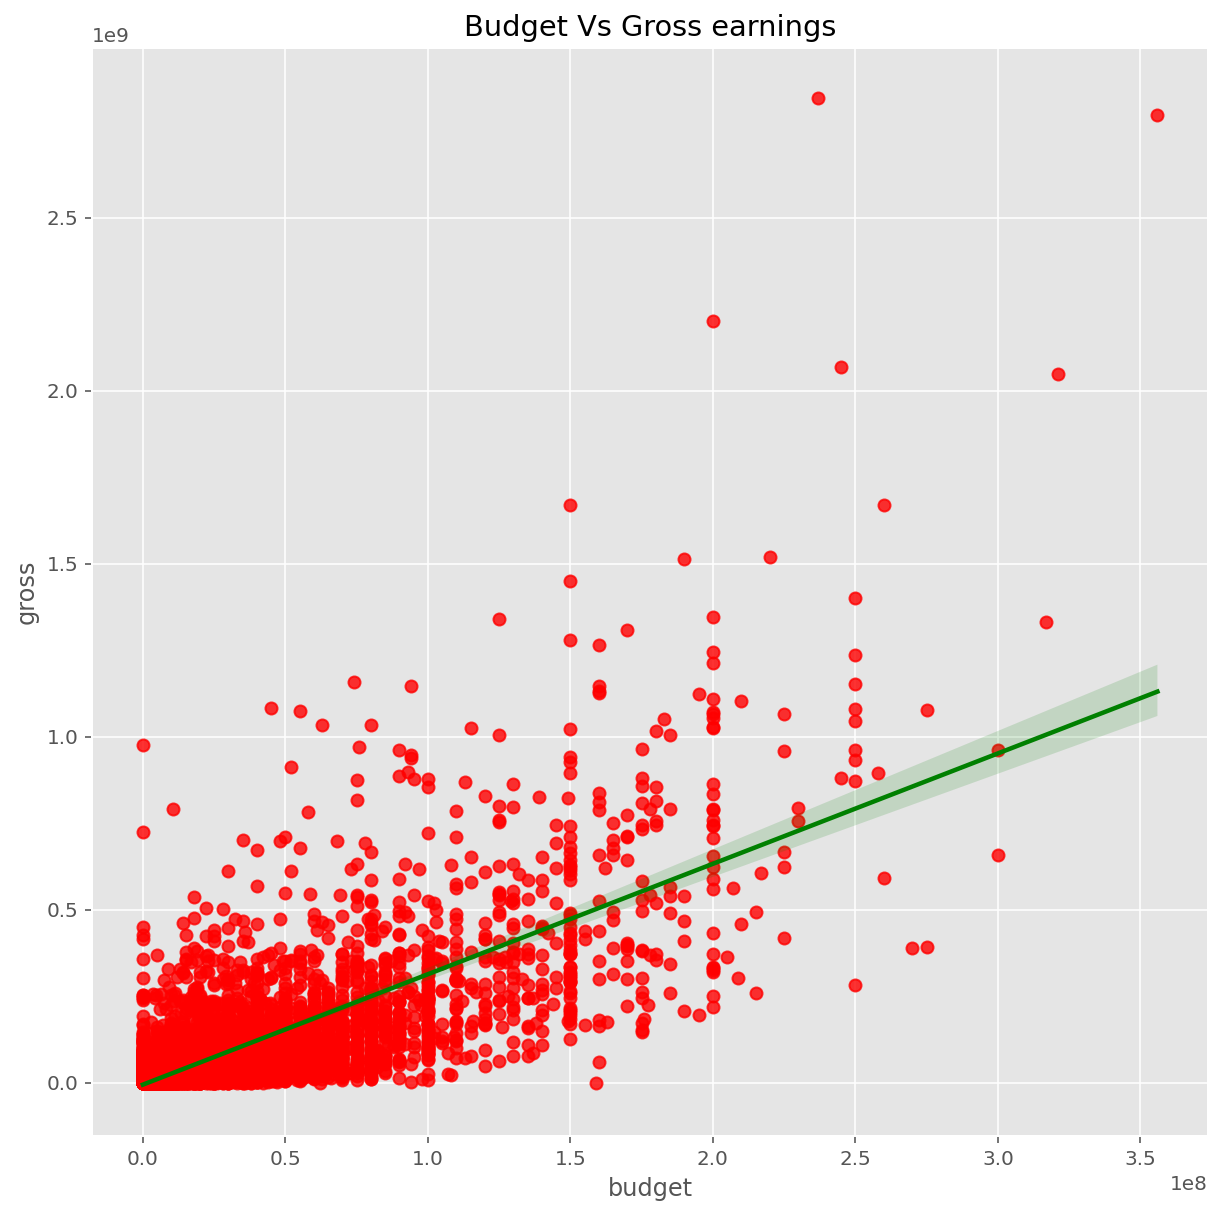

In [20]:
# Plot for the budget vs gross using seaborn
plt.figure(figsize = (10, 10))
sns.regplot(x='budget', y='gross', data = movie_df, scatter_kws = {"color": "red"},line_kws = {"color":"green"})
plt.title('Budget Vs Gross earnings');

In [37]:
# Correlation values (pearson, kendell, spearman)
movie_corr = movie_df.corr()
movie_corr

,release_year,release_day,score,votes,budget,gross,profit,runtime,success
release_year,1.000000,0.000510,0.102744,0.215582,0.297674,0.253253,0.218647,0.117462,0.113959
release_day,0.000510,1.000000,-0.005262,-0.013127,0.000808,-0.005899,-0.007262,0.006067,-0.012999
score,0.102744,-0.005262,1.000000,0.409406,0.057549,0.187112,0.207051,0.396445,0.184830
votes,0.215582,-0.013127,0.409406,1.000000,0.485820,0.632273,0.617997,0.308339,0.208420
budget,0.297674,0.000808,0.057549,0.485820,1.000000,0.749703,0.613967,0.268235,0.037453
gross,0.253253,-0.005899,0.187112,0.632273,0.749703,1.000000,0.982652,0.244519,0.229754
profit,0.218647,-0.007262,0.207051,0.617997,0.613967,0.982652,1.000000,0.216479,0.263543
runtime,0.117462,0.006067,0.396445,0.308339,0.268235,0.244519,0.216479,1.000000,0.035995
success,0.113959,-0.012999,0.184830,0.208420,0.037453,0.229754,0.263543,0.035995,1.000000


In [38]:
# checking high correlation
corr_matrix = movie_corr.corr()
corr_matrix_pairs = corr_matrix.unstack()
corr_matrix_pairs.sort_values()

votes        release_day   -0.563879
release_day  votes         -0.563879
gross        release_day   -0.487057
release_day  gross         -0.487057
profit       release_day   -0.484823
                              ...   
votes        votes          1.000000
score        score          1.000000
release_day  release_day    1.000000
runtime      runtime        1.000000
success      success        1.000000
Length: 81, dtype: float64

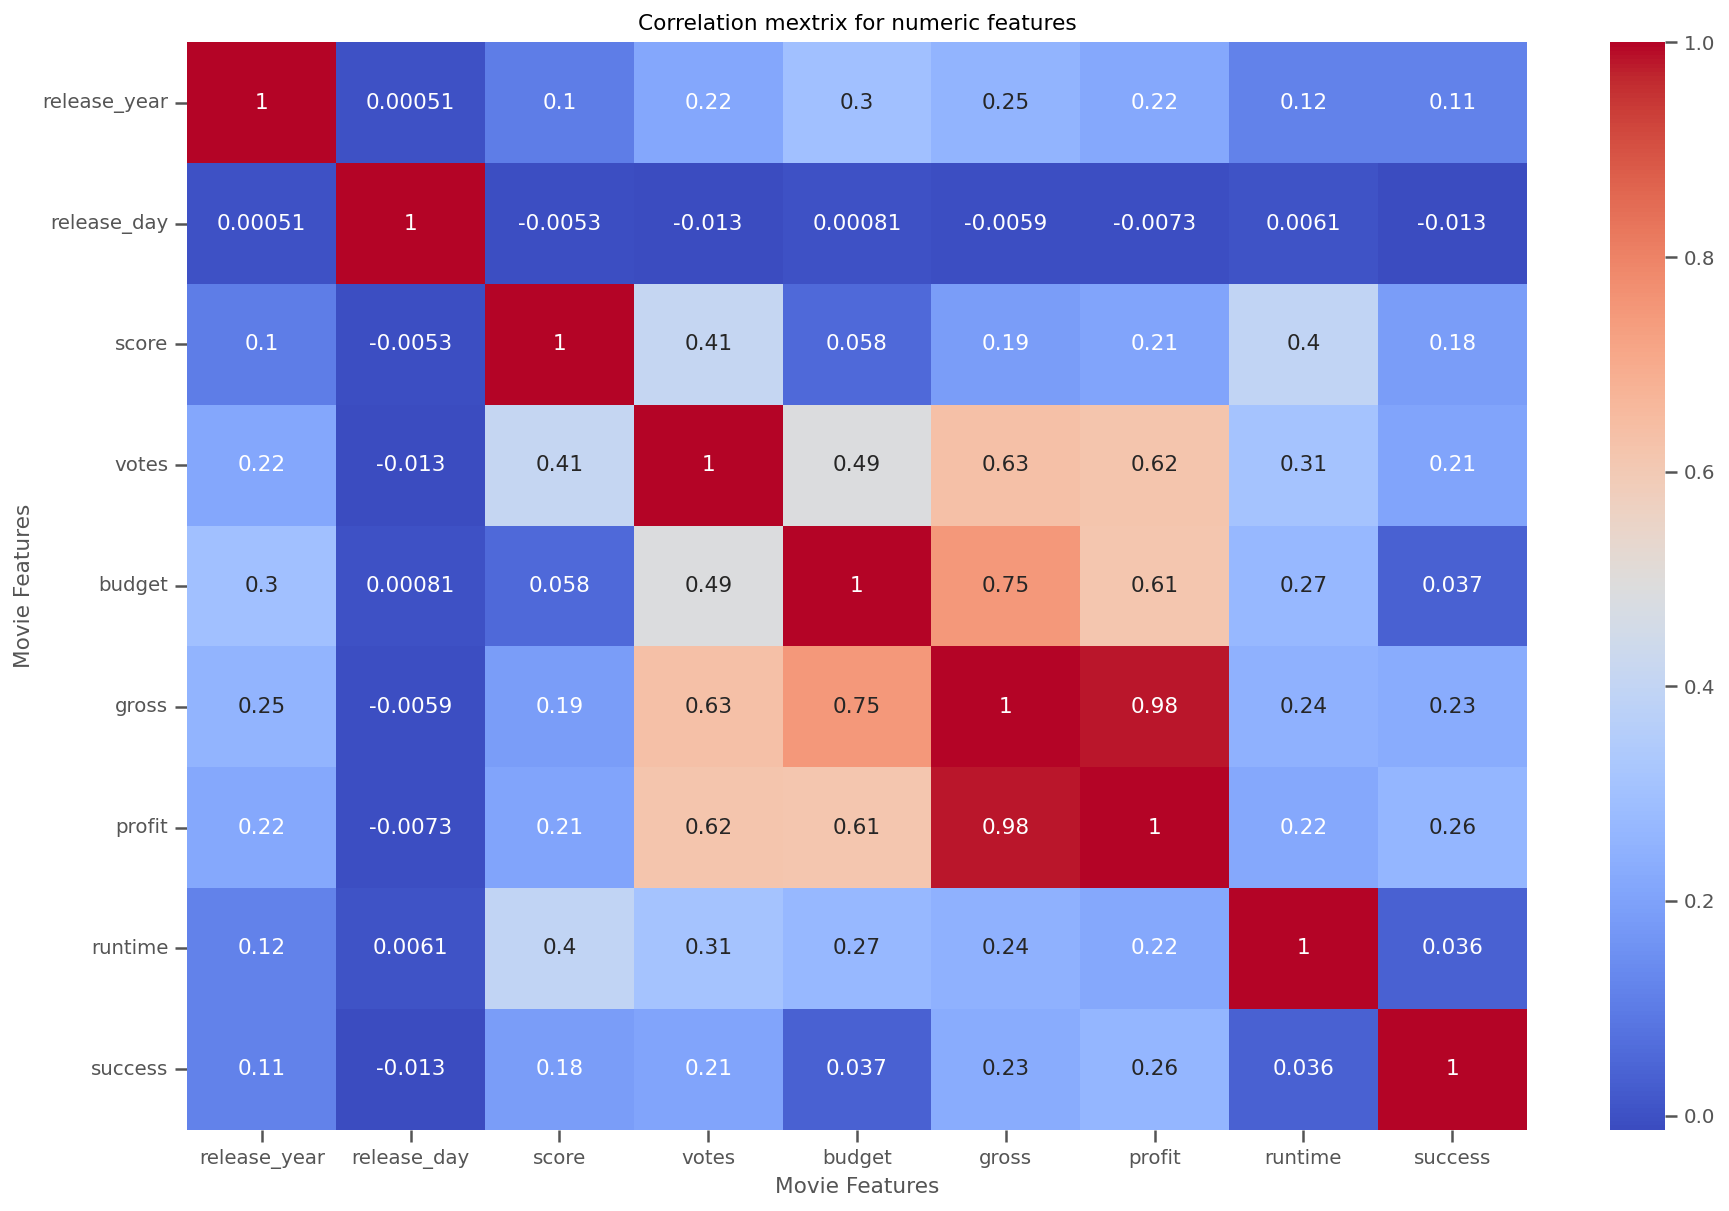

In [33]:
# Correlation between variables using seaborn
sns.set_context('notebook', font_scale = 0.9)
plt.figure(figsize=(15,10))
Correelation_plot = sns.heatmap(movie_df.corr(), cmap="coolwarm", annot=True)
plt.title('Correlation mextrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

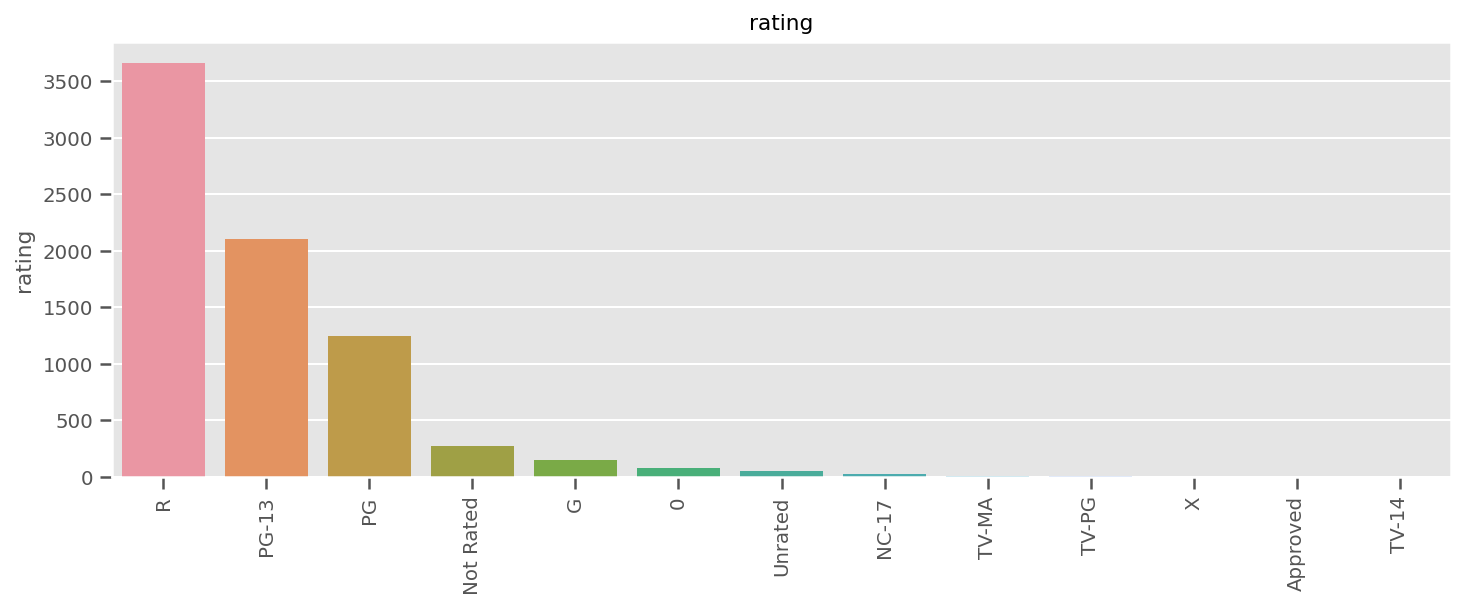

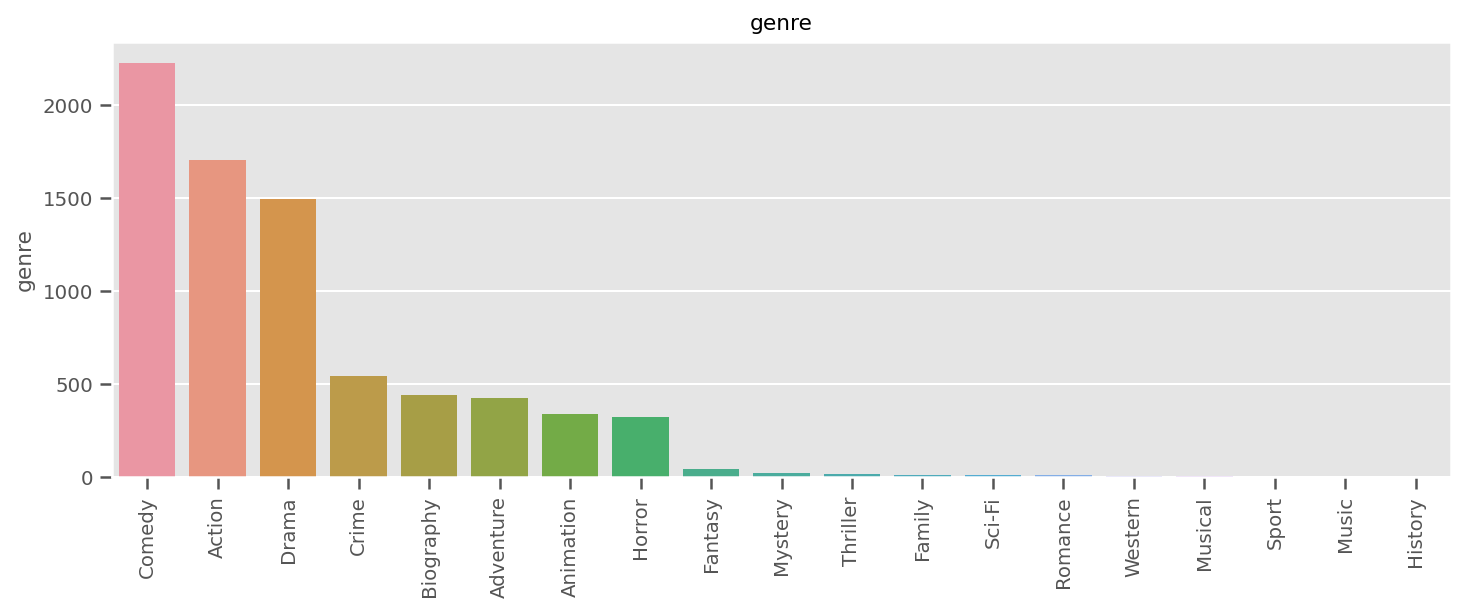

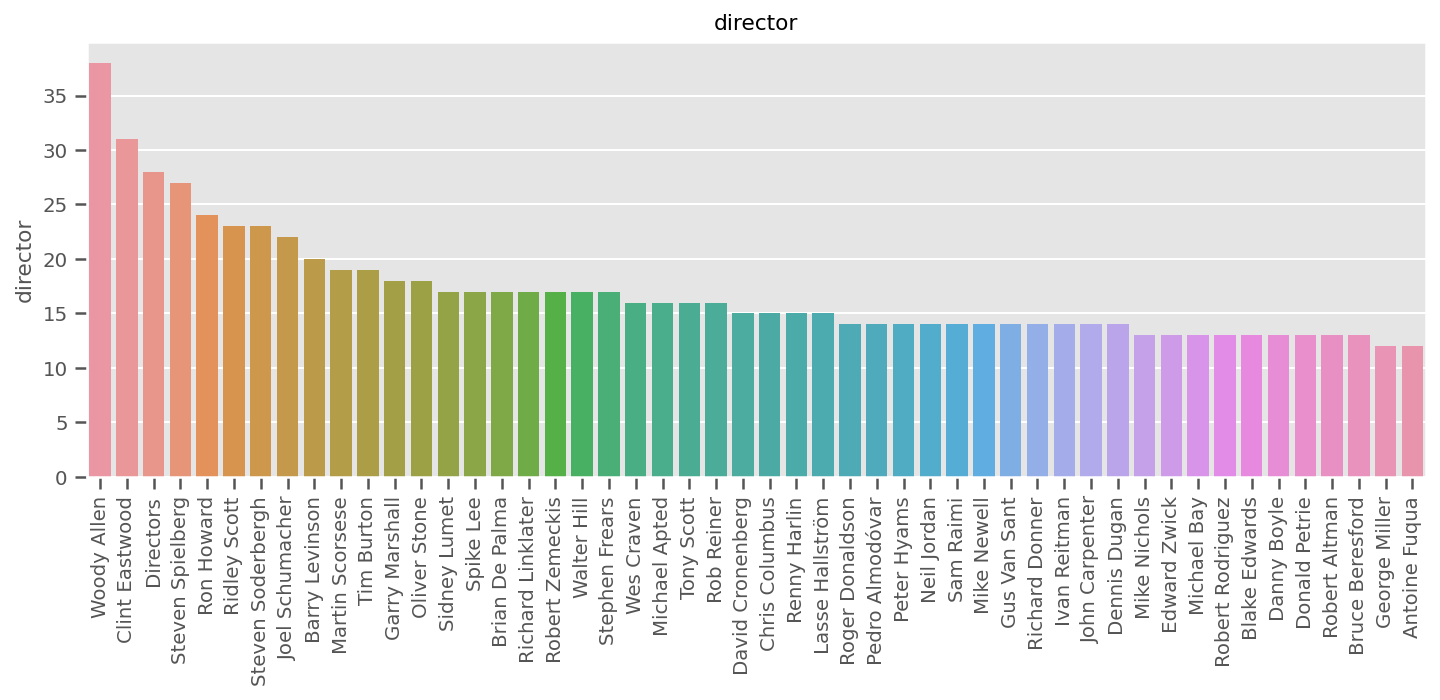

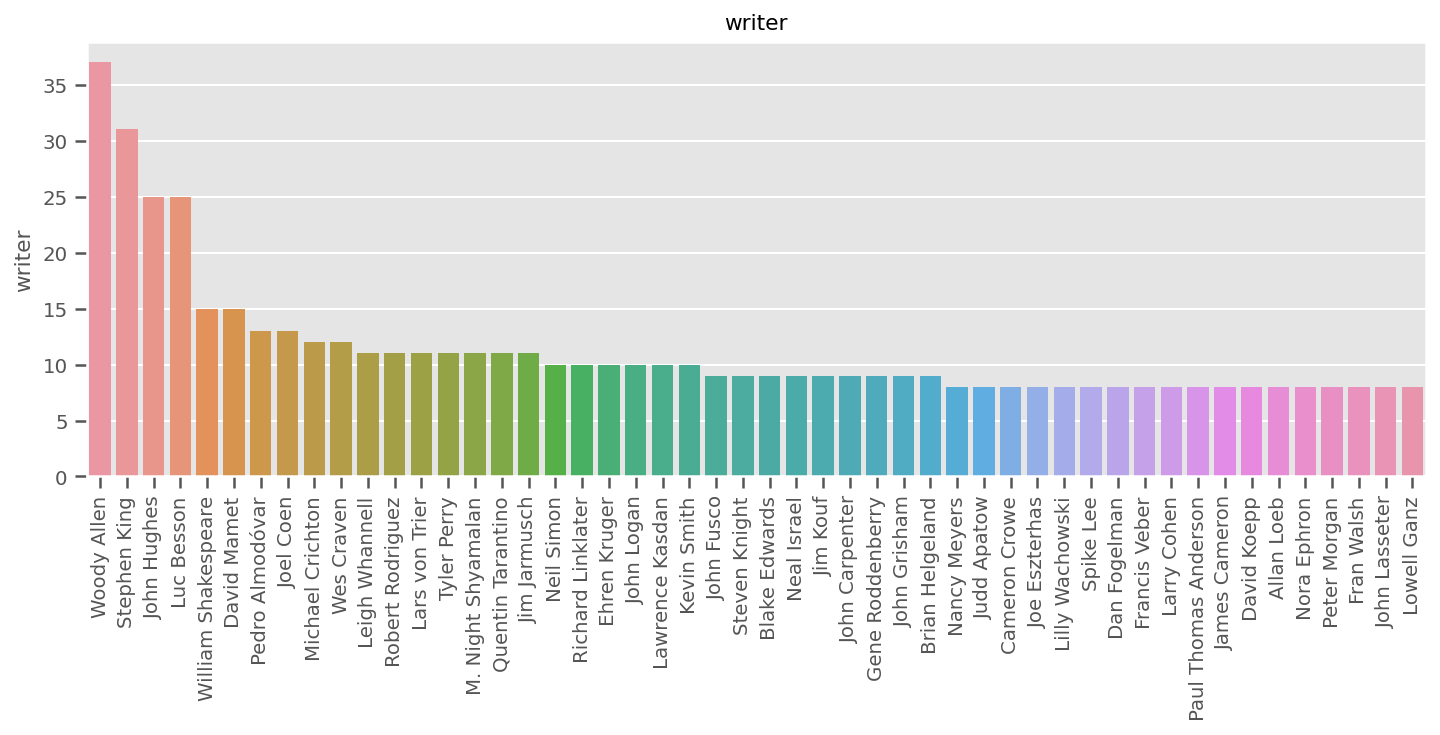

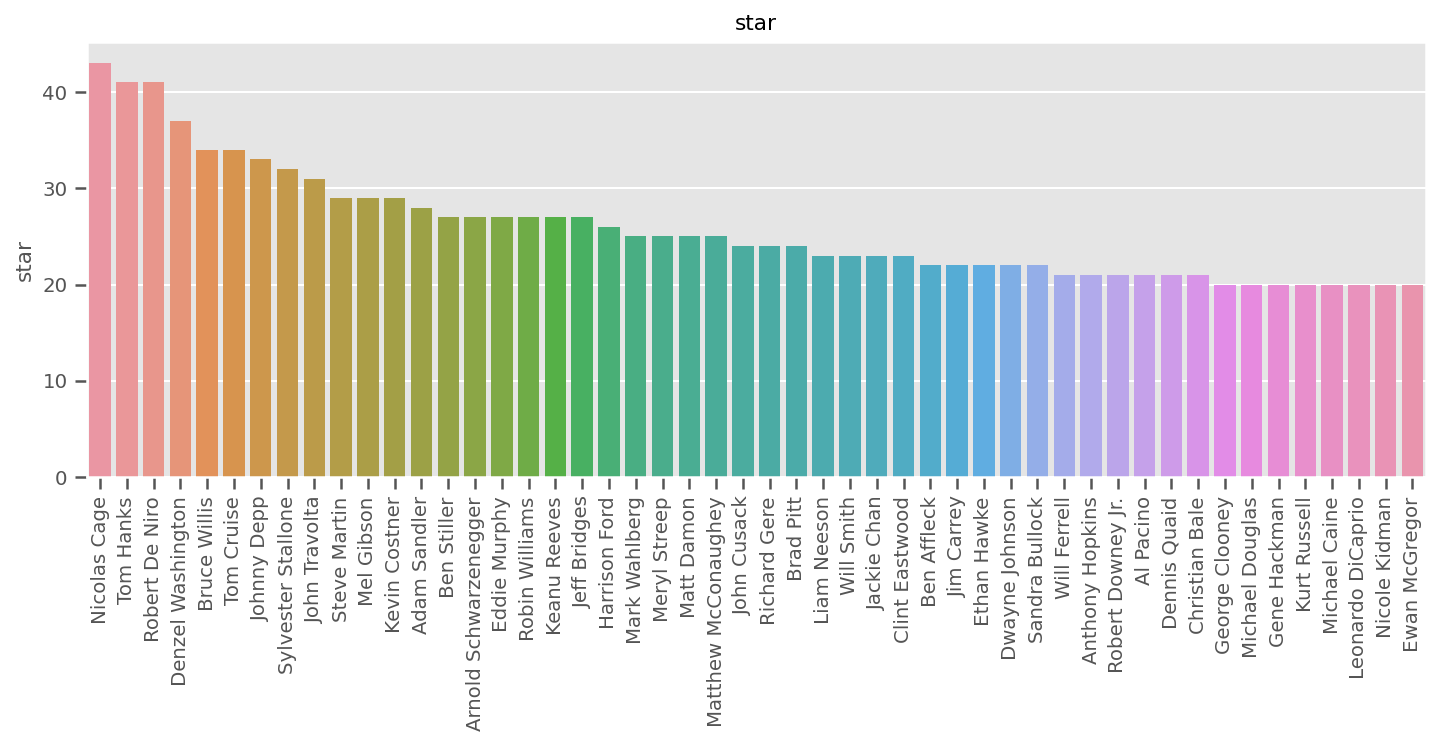

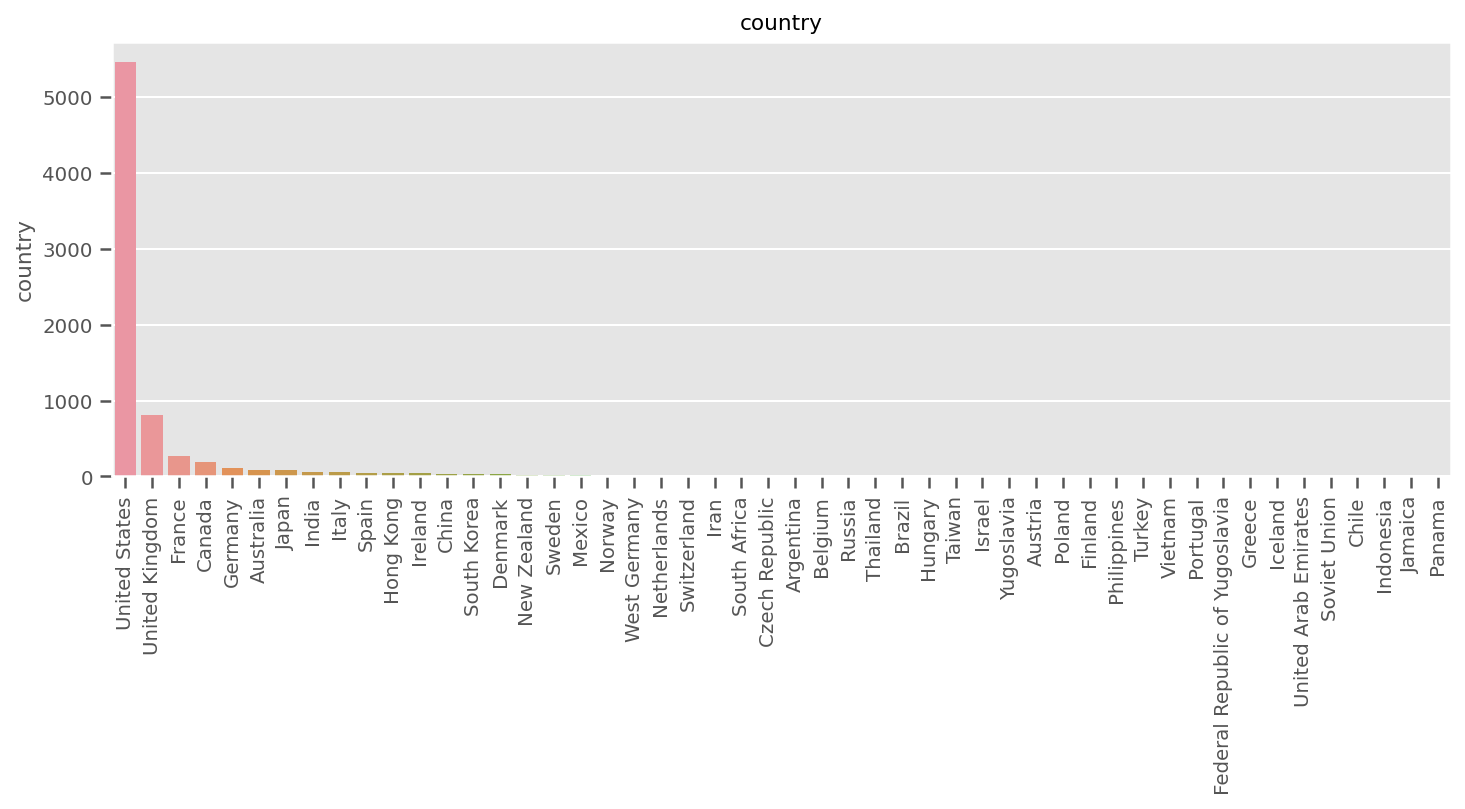

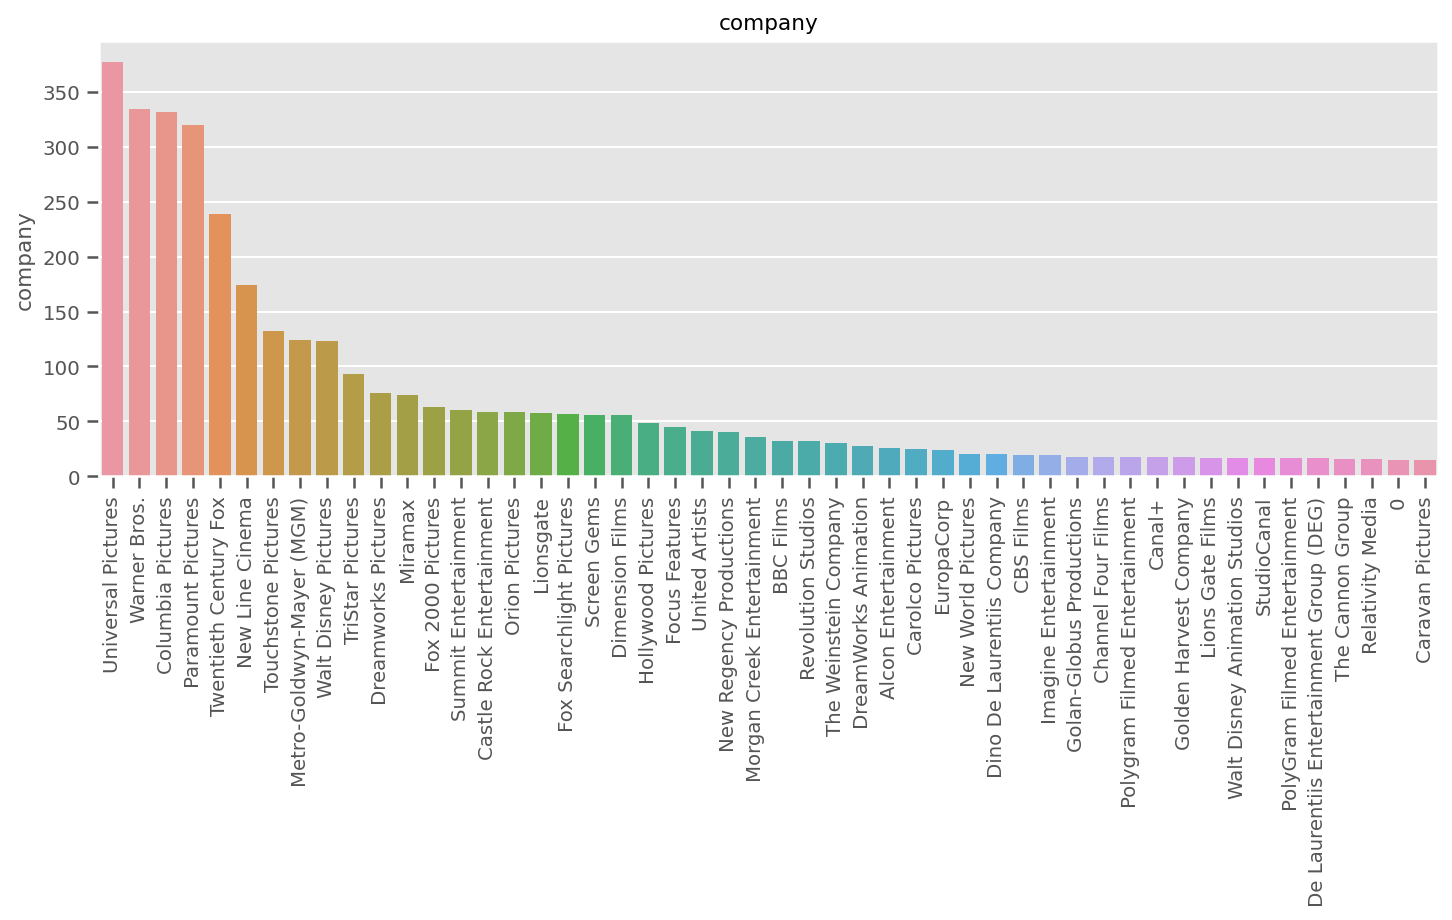

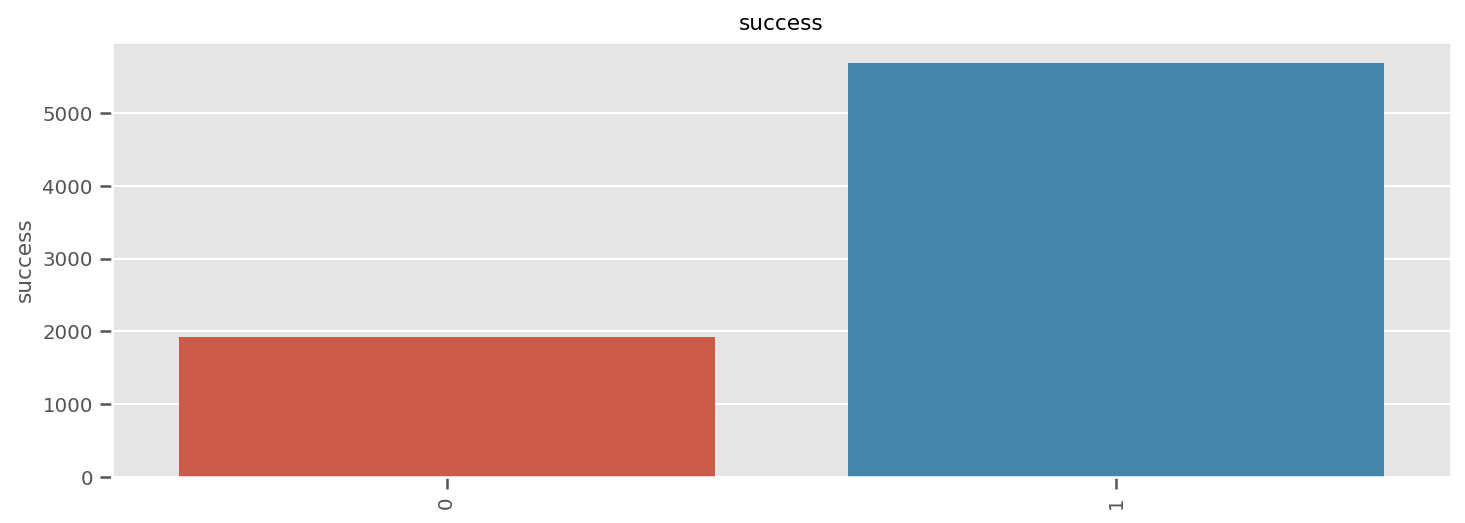

In [23]:
# Create bar plots for categorical data

df_cols = ['rating', 'genre', 'director', 'writer', 'star', 'country', 'company', 'success']

for i in df_cols:
    plt.figure(figsize = (12,4))
    sns.barplot(x = movie_df[i].value_counts().index[0:50], 
                y = movie_df[i].value_counts()[0:50]).set_title(i)
    plt.xticks(rotation='vertical')
    plt.show()

In [67]:
# Converted objects in to categorical data
df2 = movie_df

for i in df2.columns:
    if(df2[i].dtype=="object"):
        df2[i]=df2[i].astype("category")
        df2[i]=df2[i].cat.codes

In [69]:
# Correlation after conversion in categorical data
corr_matrix = df2.corr()
corr_matrix = corr_matrix.unstack()
cat_matrix = corr_matrix.sort_values()
cat_matrix

genre     budget     -0.333763
budget    genre      -0.333763
genre     gross      -0.233625
gross     genre      -0.233625
genre     profit     -0.185122
                        ...   
budget    budget      1.000000
gross     gross       1.000000
profit    profit      1.000000
director  director    1.000000
success   success     1.000000
Length: 324, dtype: float64

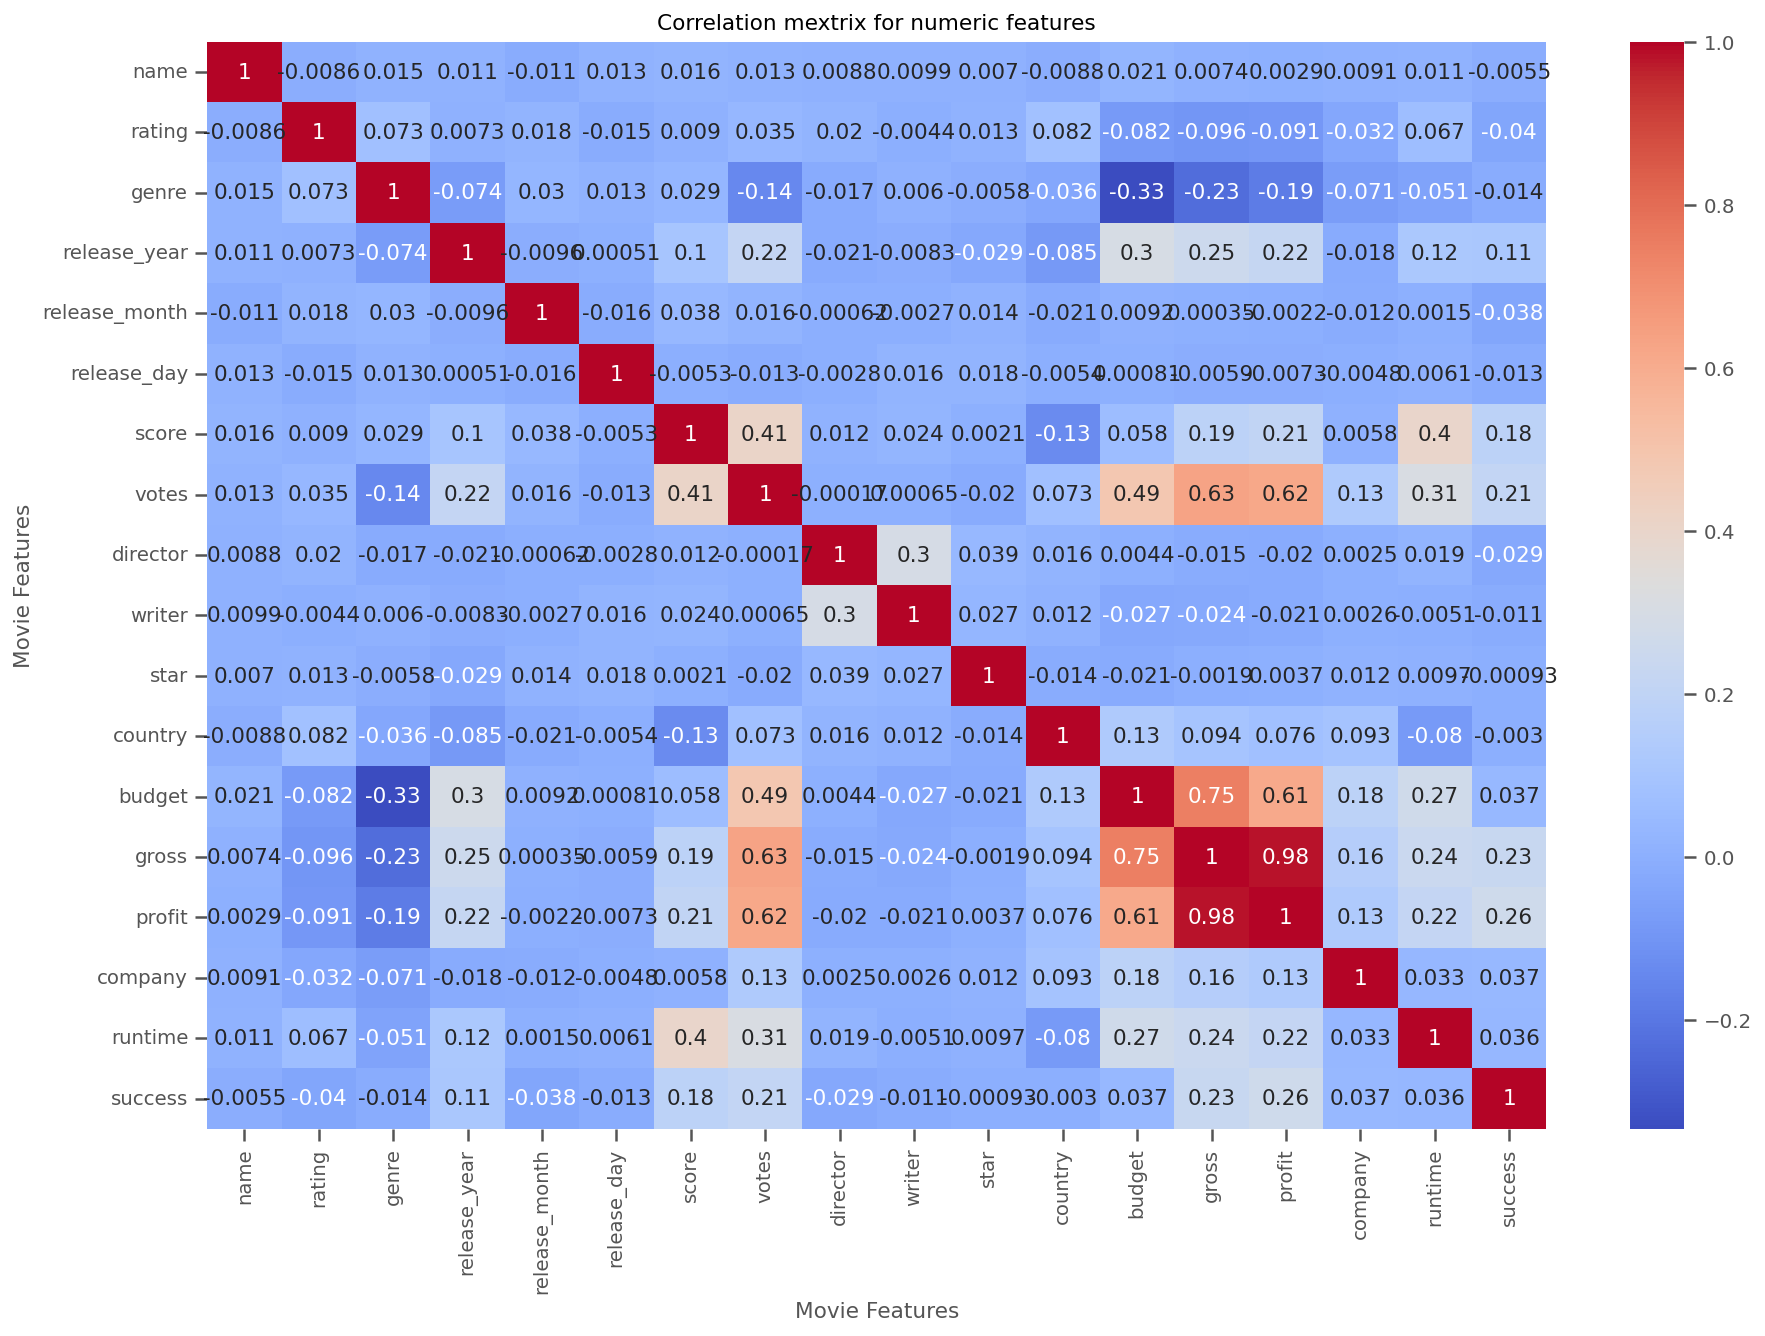

In [72]:
# Categorical correlation between variables using seaborn
sns.set_context('notebook', font_scale = 0.9)
plt.figure(figsize=(15,10))
Correelation_plot = sns.heatmap(df2.corr(), cmap="coolwarm", annot=True)
plt.title('Correlation mextrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [73]:
highest_corr = cat_matrix[(cat_matrix)>0.5]
highest_corr

profit         budget           0.613967
budget         profit           0.613967
votes          profit           0.617997
profit         votes            0.617997
votes          gross            0.632273
gross          votes            0.632273
               budget           0.749703
budget         gross            0.749703
gross          profit           0.982652
profit         gross            0.982652
name           name             1.000000
company        company          1.000000
rating         rating           1.000000
genre          genre            1.000000
release_year   release_year     1.000000
release_month  release_month    1.000000
release_day    release_day      1.000000
score          score            1.000000
runtime        runtime          1.000000
votes          votes            1.000000
writer         writer           1.000000
star           star             1.000000
country        country          1.000000
budget         budget           1.000000
gross          g

# Highest correlation is between:


-- 1. gross and budget = 0.749703 

-- 2. gross and votes = 0.632273
